In [1]:
import yesg
from pandas_datareader import data  as pdr #修正
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf #追加
yf.pdr_override() #追加

In [2]:
y=yesg.get_esg_full('AAL')

In [8]:
y['Total-Score'].values[0]

'29.1'

In [4]:
data = pdr.get_data_yahoo('AAL',  '2020-01-01', '2022-12-31') 

[*********************100%***********************]  1 of 1 completed


In [5]:
total_return = (data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1

In [6]:
tickers=pd.read_csv('sp500_alive.csv')

In [27]:
result_df = pd.DataFrame(columns=['ticker', 'return', 'esgscore'])
for index, row in tickers.iterrows():
    ticker = row.values[0]
    print(ticker)
    data = pdr.get_data_yahoo(ticker,  '2020-01-01', '2022-12-31') 
    total_return = (data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1
    try:
        esg=yesg.get_esg_full(ticker)
        result_df = result_df.append({'ticker': ticker, 'return': total_return, 'esgscore': esg['Total-Score'].values[0]}, ignore_index=True)
    except:
        print('esg error')
        continue
    

AAL
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
ABC
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ACGL
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
ADI
[*********************100%***********************]  1 of 1 completed
ADM
[*********************100%***********************]  1 of 1 completed
ADP
[*********************100%***********************]  1 of 1 completed
ADSK
[*********************100%***********************]  1 of 1 completed
AEE
[*********************100%***********************]  1 of 1 completed
AEP
[*********************100%*****************

In [26]:
try:
    esg=yesg.get_esg_full('ALGN')
    print('success')
except:
    print('all finish')

all finish


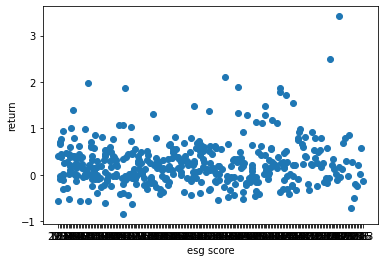

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="esg score", ylabel="return")

ax.scatter(result_df['esgscore'], result_df['return'])